#Importing the Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_scorepython
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



# Load the California housing dataset
housing = fetch_california_housing()
housing.keys()
print(housing.DESCR)

ModuleNotFoundError: No module named 'pandas'

#Learning the Dataset

In [3]:
# Create DataFrame
dataset = pd.DataFrame(data=housing.data, columns=housing.feature_names)
dataset['Price'] = housing.target


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
#Summarizing the Stats
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
#checking the Missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
# Compute correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


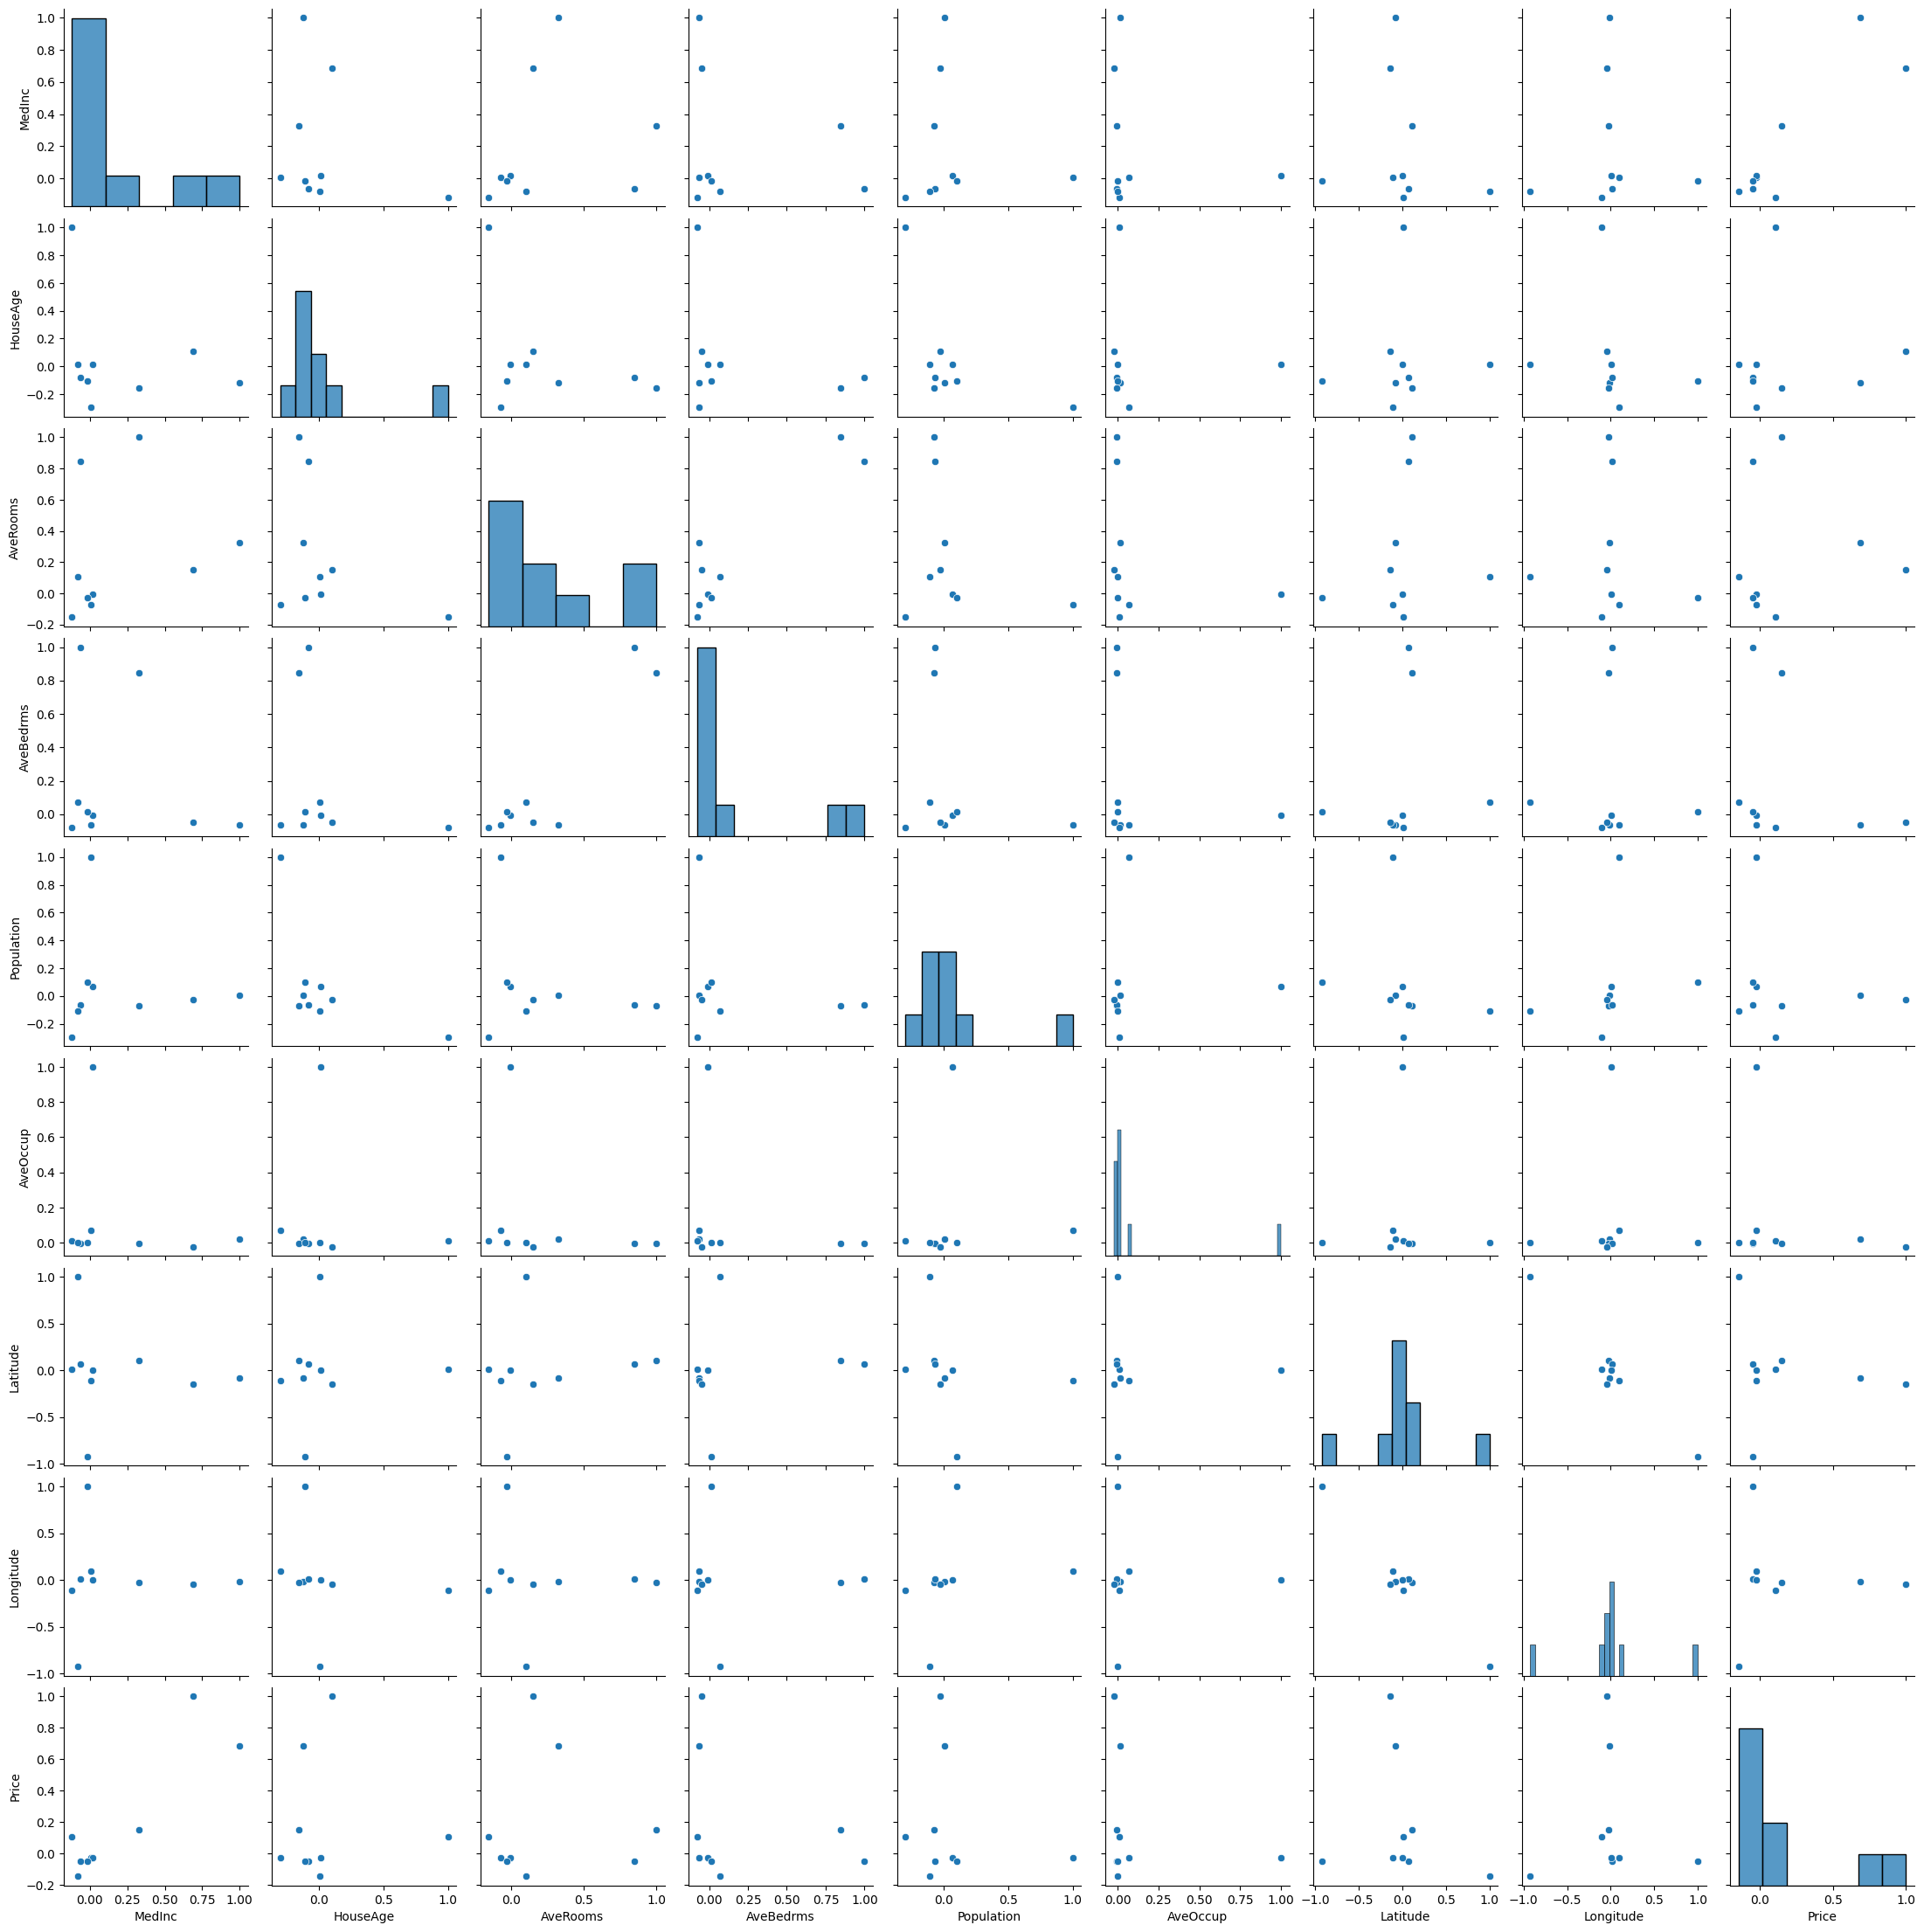

In [8]:
sns.pairplot(correlation_matrix)

Text(0, 0.5, 'Price')

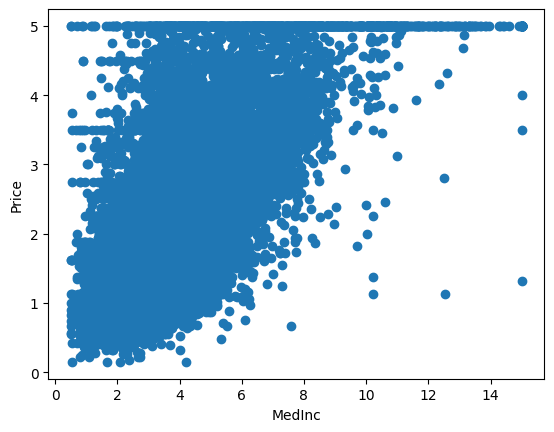

In [9]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("MedInc")
plt.ylabel("Price")

<Axes: xlabel='MedInc', ylabel='Price'>

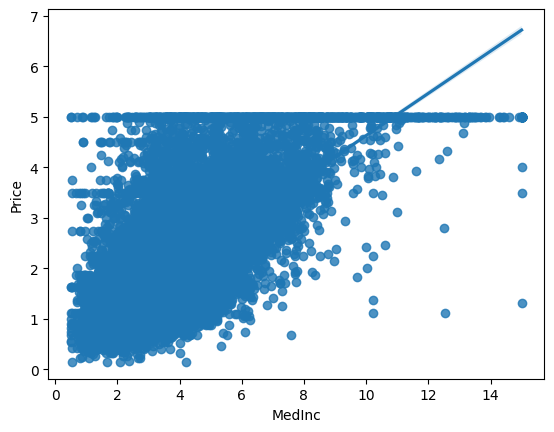

In [10]:
sns.regplot(x="MedInc",y="Price",data=dataset)

<Axes: xlabel='Latitude', ylabel='Price'>

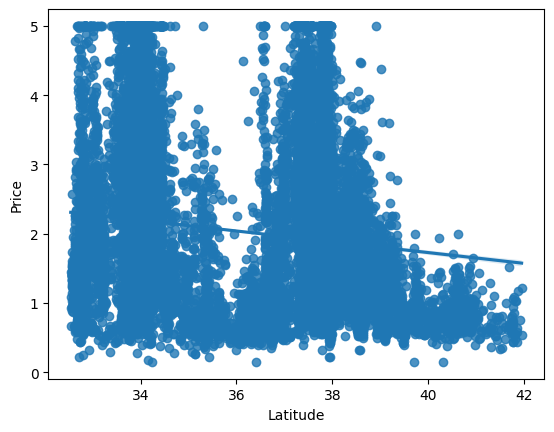

In [11]:
sns.regplot(x="Latitude",y="Price",data=dataset)

<Axes: xlabel='Price', ylabel='HouseAge'>

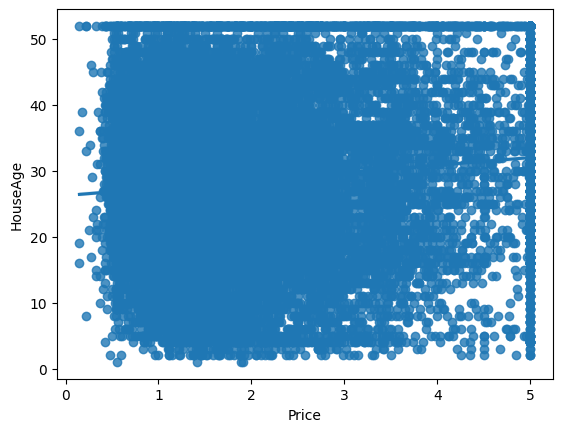

In [12]:
sns.regplot(x="Price",y="HouseAge",data=dataset)

#Preparing the Dataset

In [13]:
# Standardize the dataset
scaler = StandardScaler()
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_scaled = scaler.fit_transform(X)


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
#Printing the Coefficients
print(regression.coef_)

[ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]


In [16]:
print(regression.intercept_)

2.067862309508389


In [17]:
#Parameters on which the model is being Trained on
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Predictions and Errors

In [18]:
# Prediction
reg_pred = regression.predict(X_test)

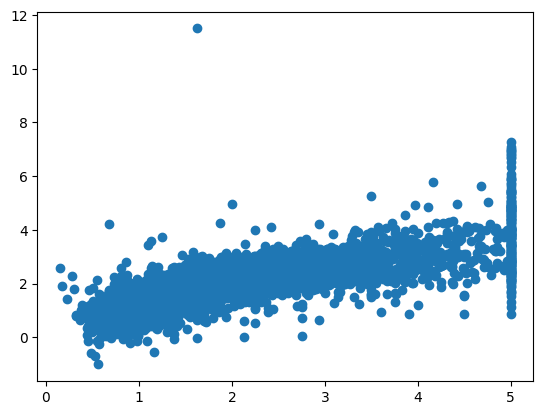

In [19]:
#Plotting a Scatter Plot for Prediction
plt.scatter(y_test,reg_pred)

In [20]:
#Finding the residuals
residuals=y_test-reg_pred
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Price, Length: 4128, dtype: float64

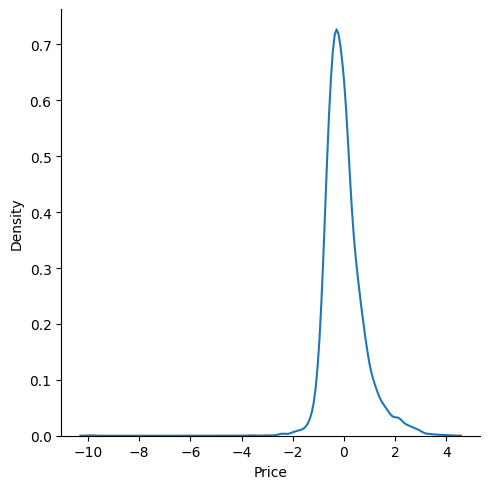

In [22]:
# Plotting Graph wiht respect to the residuals
sns.displot(residuals,kind='kde')

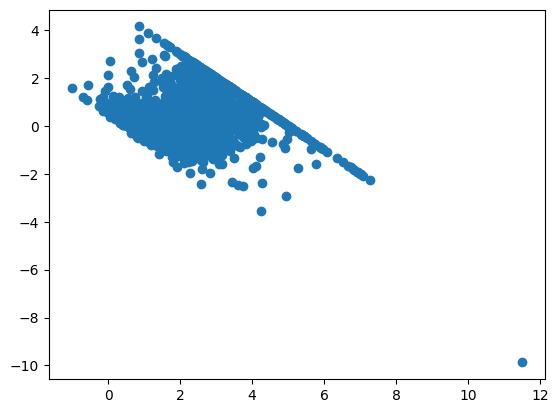

In [23]:
#Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

#Model Performance


In [24]:
#Evaluating the Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Model Evaluation
mae = mean_absolute_error(y_test, reg_pred)
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 0.5332001304956565
Mean Squared Error: 0.555891598695244
Root Mean Squared Error: 0.7455813830127761


#Cross Validating

In [25]:
#Cross Validating
cv_scores = cross_val_score(regression, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validated RMSE:", cv_rmse_scores.mean())

Cross-validated RMSE: 0.7459068363518115


#R2 and R2 adjusted Square


R2 score

In [26]:
from sklearn.metrics import r2_score
Score=r2_score(y_test,reg_pred)
print(Score)

0.5757877060324511


R2 Adjusted Score

In [27]:
adjusted_r2 = 1 - ((1 - Score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(adjusted_r2)

0.5749637928613561


#New Data Prediction

In [28]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [29]:
#Transforming new Data
scaler.transform(housing.data[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522]])

In [30]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.15194269])

#Pickling the Model File For Deployement


In [31]:
import pickle

In [32]:
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [33]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [34]:
pickled_model.predict(housing.data[0].reshape(1,-1))

array([83.8414888])

In [35]:
from google.colab import files

# Download the pickle file
files.download('regmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>